# Classification Results Visualization

This notebook visualizes the classification results from all models (fine-tuned and commercial) analyzing text classifications as Técnico (Technical) or Plano (Plain language).

In [1]:
# Import required libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ Libraries loaded successfully")

✅ Libraries loaded successfully


## Load and Explore Data

Load the classification results and examine the structure.

In [2]:
# Load the classification results
df = pd.read_csv('all_models_classification_results.csv')

print("📊 Dataset Overview")
print("=" * 60)
print(f"Total rows: {len(df)}")
print(f"Columns: {list(df.columns)}")
print("\n📋 First 5 rows:")
display(df.head())

print("\n📈 Data Summary:")
print(f"Model types: {df['model_type'].unique()}")
print(f"Model names: {df['model_name'].unique()}")
print(f"Classifications: {df['prediction_label'].dropna().unique()}")

print("\n❓ Missing values:")
print(df.isnull().sum())

print("\n🔢 Valid predictions by model type:")
print(df.groupby('model_type')['prediction_label'].apply(lambda x: x.notna().sum()))

📊 Dataset Overview
Total rows: 860
Columns: ['row_index', 'model_name', 'model_identifier', 'model_type', 'doc_key', 'original_text', 'generated_text', 'target_fk_grade', 'prediction_int', 'prediction_label']

📋 First 5 rows:


,row_index,model_name,model_identifier,model_type,doc_key,original_text,generated_text,target_fk_grade,prediction_int,prediction_label
0,0,gemma,google/gemma-3-4b-it,fine-tuned,00352b568813412b386c93bc2351ac9d32ac5c98,Background\r\nAlzheimer's disease and other fo...,Here’s a plain-language summary of the clinica...,13.0,0,Plano
1,1,gemma,google/gemma-3-4b-it,fine-tuned,0382f2eee8d97b6025a5f240bdb18ff742853707,Background\r\nTuberculous pericarditis can imp...,Here’s a plain-language summary of the clinica...,13.0,0,Plano
2,2,gemma,google/gemma-3-4b-it,fine-tuned,0505032fa6e7ae8227d049f95cd9903323cf429f,"Background\r\nWater, sanitation and hygiene (W...",Here’s a plain-language summary of the clinica...,13.0,0,Plano
3,3,gemma,google/gemma-3-4b-it,fine-tuned,051756b81a8e6dcf5fac7dd9e7a2154e866ad0cc,Background\r\nFertility problems are very comm...,"Okay, here’s a plain-language summary of the c...",13.0,0,Plano
4,4,gemma,google/gemma-3-4b-it,fine-tuned,0578a72c3fb911dd881a7819009b57292a3323b8,Background\r\nOnychomycosis refers to fungal i...,"Okay, here’s a plain-language summary of the c...",13.0,0,Plano



📈 Data Summary:
Model types: ['fine-tuned' 'commercial']
Model names: ['gemma' 'qwen' 'generated_claude-sonnet-4-5' 'generated_chatgpt-5'
 'claude-haiku-4-5' 'gpt-4o']
Classifications: ['Plano' 'Técnico']

❓ Missing values:
row_index             0
model_name            0
model_identifier      0
model_type            0
doc_key               0
original_text         0
generated_text        0
target_fk_grade     800
prediction_int        0
prediction_label      0
dtype: int64

🔢 Valid predictions by model type:
model_type
commercial    800
fine-tuned     60
Name: prediction_label, dtype: int64


## Comprehensive Visualizations

Create 6 detailed plots to analyze the classification results.

Creating visualizations for 6 models...


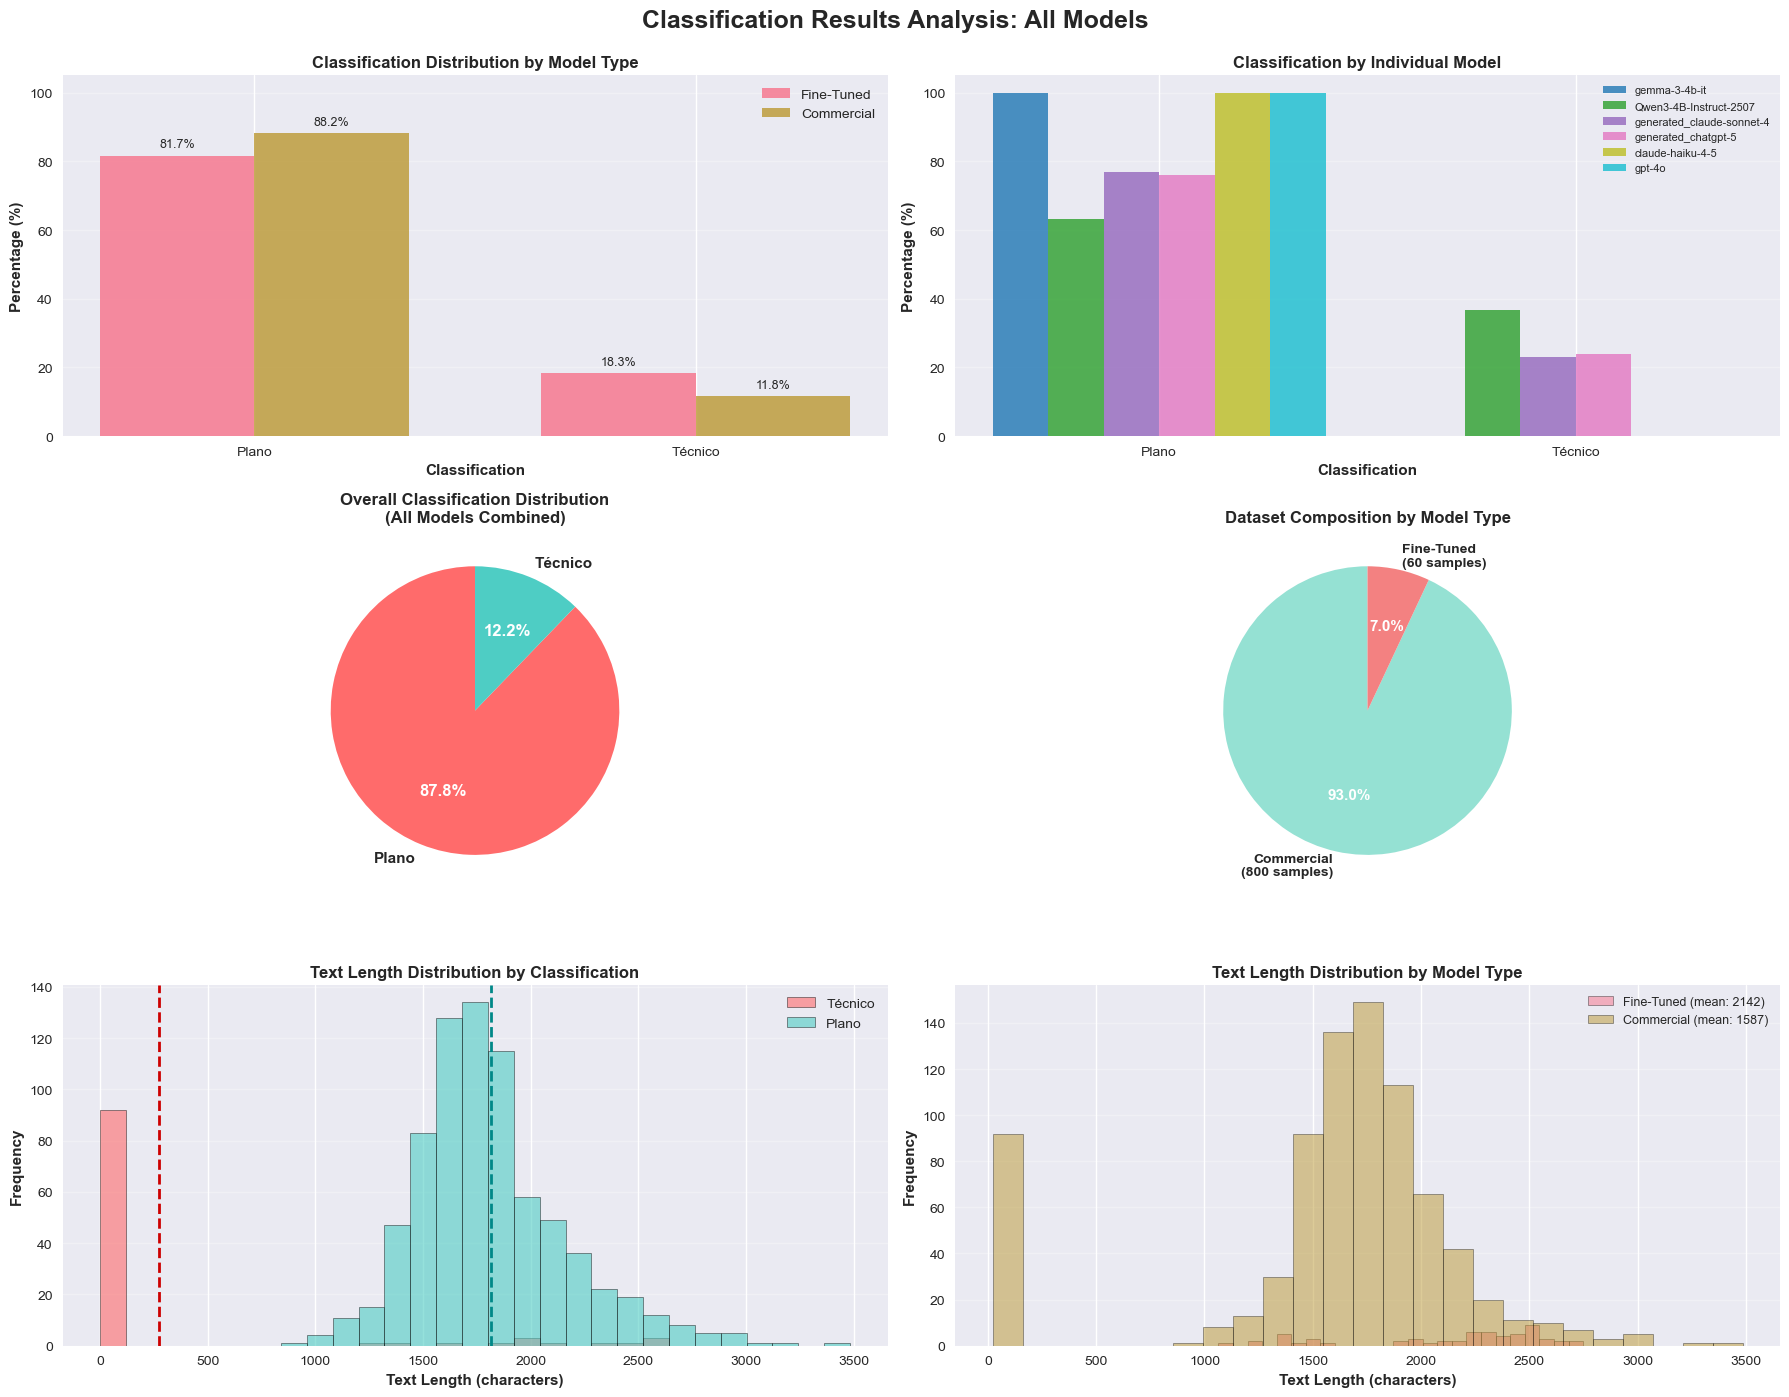


✅ Visualizations created successfully!


In [3]:
# Create comprehensive visualization with 6 plots
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
fig.suptitle('Classification Results Analysis: All Models', fontsize=18, fontweight='bold', y=0.995)

# Get data for plotting
model_types = df['model_type'].unique()
model_names = df['model_name'].unique()
classifications = sorted(df['prediction_label'].dropna().unique())

print(f"Creating visualizations for {len(model_names)} models...")

# ========================================
# Plot 1: Classification by Model Type (Percentages)
# ========================================
ax1 = axes[0, 0]

x = np.arange(len(classifications))
width = 0.35

for i, model_type in enumerate(model_types):
    type_data = df[df['model_type'] == model_type]
    percentages = []
    
    for classification in classifications:
        count = len(type_data[type_data['prediction_label'] == classification])
        total = len(type_data['prediction_label'].dropna())
        pct = (count / total * 100) if total > 0 else 0
        percentages.append(pct)
    
    ax1.bar(x + i*width - width/2, percentages, width, 
            label=model_type.title(), alpha=0.8)

ax1.set_xlabel('Classification', fontsize=11, fontweight='bold')
ax1.set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
ax1.set_title('Classification Distribution by Model Type', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(classifications)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_ylim(0, 105)

# Add percentage labels
for i, model_type in enumerate(model_types):
    type_data = df[df['model_type'] == model_type]
    for j, classification in enumerate(classifications):
        count = len(type_data[type_data['prediction_label'] == classification])
        total = len(type_data['prediction_label'].dropna())
        pct = (count / total * 100) if total > 0 else 0
        if pct > 0:
            ax1.text(j + i*width - width/2, pct + 1.5, f'{pct:.1f}%', 
                    ha='center', va='bottom', fontsize=9)

# ========================================
# Plot 2: Individual Model Comparison (Percentages)
# ========================================
ax2 = axes[0, 1]

n_models = len(model_names)
x = np.arange(len(classifications))
width = 0.8 / n_models

colors = plt.cm.tab10(np.linspace(0, 1, n_models))

for i, model_name in enumerate(model_names):
    model_data = df[df['model_name'] == model_name]
    model_id = model_data['model_identifier'].iloc[0] if len(model_data) > 0 else model_name
    short_name = model_id.split('/')[-1] if '/' in model_id else model_name
    
    percentages = []
    for classification in classifications:
        count = len(model_data[model_data['prediction_label'] == classification])
        total = len(model_data['prediction_label'].dropna())
        pct = (count / total * 100) if total > 0 else 0
        percentages.append(pct)
    
    ax2.bar(x + i*width - width*(n_models-1)/2, percentages, width,
            label=short_name[:25], alpha=0.8, color=colors[i])

ax2.set_xlabel('Classification', fontsize=11, fontweight='bold')
ax2.set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
ax2.set_title('Classification by Individual Model', fontsize=12, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(classifications)
ax2.legend(fontsize=8, loc='upper right')
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim(0, 105)

# ========================================
# Plot 3: Overall Distribution (Pie Chart)
# ========================================
ax3 = axes[1, 0]

all_predictions = df['prediction_label'].dropna()
if len(all_predictions) > 0:
    pred_counts = Counter(all_predictions)
    labels = list(pred_counts.keys())
    sizes = list(pred_counts.values())
    colors_pie = ['#ff6b6b', '#4ecdc4'] if len(labels) == 2 else plt.cm.Set3(np.linspace(0, 1, len(labels)))
    
    wedges, texts, autotexts = ax3.pie(sizes, labels=labels, autopct='%1.1f%%',
                                        startangle=90, colors=colors_pie,
                                        textprops={'fontsize': 11, 'fontweight': 'bold'})
    
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(12)
        autotext.set_fontweight('bold')
    
    ax3.set_title('Overall Classification Distribution\n(All Models Combined)', 
                  fontsize=12, fontweight='bold')

# ========================================
# Plot 4: Model Type Composition
# ========================================
ax4 = axes[1, 1]

type_counts = df['model_type'].value_counts()
labels_pie = [f'{t.title()}\n({c} samples)' for t, c in zip(type_counts.index, type_counts.values)]
colors_pie = ['#95e1d3', '#f38181']

wedges, texts, autotexts = ax4.pie(type_counts.values, labels=labels_pie, 
                                     autopct='%1.1f%%', startangle=90,
                                     colors=colors_pie,
                                     textprops={'fontsize': 10, 'fontweight': 'bold'})

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

ax4.set_title('Dataset Composition by Model Type', fontsize=12, fontweight='bold')

# ========================================
# Plot 5: Text Length by Classification
# ========================================
ax5 = axes[2, 0]

tech_lengths = []
plain_lengths = []

for _, row in df.iterrows():
    if pd.notna(row['prediction_label']) and pd.notna(row['generated_text']):
        text_length = len(str(row['generated_text']))
        if row['prediction_label'] == 'Técnico':
            tech_lengths.append(text_length)
        elif row['prediction_label'] == 'Plano':
            plain_lengths.append(text_length)

if tech_lengths and plain_lengths:
    bins = np.linspace(0, max(max(tech_lengths), max(plain_lengths)), 30)
    ax5.hist(tech_lengths, bins=bins, alpha=0.6, label='Técnico', 
            color='#ff6b6b', edgecolor='black', linewidth=0.5)
    ax5.hist(plain_lengths, bins=bins, alpha=0.6, label='Plano', 
            color='#4ecdc4', edgecolor='black', linewidth=0.5)
    
    ax5.set_xlabel('Text Length (characters)', fontsize=11, fontweight='bold')
    ax5.set_ylabel('Frequency', fontsize=11, fontweight='bold')
    ax5.set_title('Text Length Distribution by Classification', fontsize=12, fontweight='bold')
    ax5.legend(fontsize=10)
    ax5.grid(True, alpha=0.3, axis='y')
    
    # Add mean lines
    ax5.axvline(np.mean(tech_lengths), color='#cc0000', linestyle='--', linewidth=2)
    ax5.axvline(np.mean(plain_lengths), color='#008888', linestyle='--', linewidth=2)

# ========================================
# Plot 6: Text Length by Model Type
# ========================================
ax6 = axes[2, 1]

for model_type in df['model_type'].unique():
    type_data = df[df['model_type'] == model_type]
    lengths = []
    
    for _, row in type_data.iterrows():
        if pd.notna(row['prediction_label']) and pd.notna(row['generated_text']):
            lengths.append(len(str(row['generated_text'])))
    
    if lengths:
        ax6.hist(lengths, bins=25, alpha=0.5, label=f'{model_type.title()} (mean: {np.mean(lengths):.0f})',
                edgecolor='black', linewidth=0.5)

ax6.set_xlabel('Text Length (characters)', fontsize=11, fontweight='bold')
ax6.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax6.set_title('Text Length Distribution by Model Type', fontsize=12, fontweight='bold')
ax6.legend(fontsize=9)
ax6.grid(True, alpha=0.3, axis='y')

# Display
plt.tight_layout()
plt.show()

print("\n✅ Visualizations created successfully!")

## Statistical Summary

Detailed statistics for all models and classifications.

In [4]:
print("=" * 70)
print("STATISTICAL SUMMARY - ALL MODELS CLASSIFICATION RESULTS")
print("=" * 70)

# 1. Overall Statistics
print("\n1️⃣ OVERALL STATISTICS")
print("-" * 40)
total_rows = len(df)
valid_predictions = df['prediction_label'].notna().sum()
print(f"Total samples: {total_rows}")
print(f"Valid predictions: {valid_predictions} ({(valid_predictions/total_rows*100):.1f}%)")
print(f"Failed predictions: {total_rows - valid_predictions} ({((total_rows-valid_predictions)/total_rows*100):.1f}%)")

# 2. Classification Distribution
print("\n2️⃣ OVERALL CLASSIFICATION DISTRIBUTION")
print("-" * 40)
all_predictions = df['prediction_label'].dropna()
if len(all_predictions) > 0:
    pred_counts = Counter(all_predictions)
    total = len(all_predictions)
    for label in sorted(pred_counts.keys()):
        count = pred_counts[label]
        percentage = (count / total) * 100
        print(f"{label}: {count} samples ({percentage:.1f}%)")

# 3. Statistics by Model Type
print("\n3️⃣ STATISTICS BY MODEL TYPE")
print("-" * 40)
for model_type in df['model_type'].unique():
    type_data = df[df['model_type'] == model_type]
    valid = type_data['prediction_label'].notna().sum()
    total_type = len(type_data)
    
    print(f"\n{model_type.upper()} Models:")
    print(f"  Total samples: {total_type}")
    print(f"  Valid predictions: {valid} ({(valid/total_type*100):.1f}%)")
    
    type_predictions = type_data['prediction_label'].dropna()
    if len(type_predictions) > 0:
        type_counts = Counter(type_predictions)
        total_type_pred = len(type_predictions)
        for label in sorted(type_counts.keys()):
            count = type_counts[label]
            percentage = (count / total_type_pred) * 100
            print(f"  {label}: {count} samples ({percentage:.1f}%)")

# 4. Statistics by Individual Model
print("\n4️⃣ STATISTICS BY INDIVIDUAL MODEL")
print("-" * 40)
for model_name in df['model_name'].unique():
    model_data = df[df['model_name'] == model_name]
    model_id = model_data['model_identifier'].iloc[0] if len(model_data) > 0 else 'N/A'
    model_type = model_data['model_type'].iloc[0] if len(model_data) > 0 else 'N/A'
    
    valid = model_data['prediction_label'].notna().sum()
    total_model = len(model_data)
    
    print(f"\n{model_name.upper()} ({model_type})")
    print(f"  Model ID: {model_id}")
    print(f"  Total samples: {total_model}")
    print(f"  Valid predictions: {valid} ({(valid/total_model*100):.1f}%)")
    
    model_predictions = model_data['prediction_label'].dropna()
    if len(model_predictions) > 0:
        model_counts = Counter(model_predictions)
        total_model_pred = len(model_predictions)
        for label in sorted(model_counts.keys()):
            count = model_counts[label]
            percentage = (count / total_model_pred) * 100
            print(f"  {label}: {count} samples ({percentage:.1f}%)")

# 5. Text Length Analysis
print("\n5️⃣ TEXT LENGTH ANALYSIS")
print("-" * 40)

# Overall text lengths
all_lengths = [len(str(text)) for text in df['generated_text'].dropna()]
if all_lengths:
    print(f"\nOverall text lengths:")
    print(f"  Mean: {np.mean(all_lengths):.0f} characters")
    print(f"  Std: {np.std(all_lengths):.0f} characters")
    print(f"  Min: {np.min(all_lengths):.0f} characters")
    print(f"  Max: {np.max(all_lengths):.0f} characters")

# By classification
for label in sorted(df['prediction_label'].dropna().unique()):
    texts = df[df['prediction_label'] == label]['generated_text'].dropna()
    if len(texts) > 0:
        lengths = [len(str(text)) for text in texts]
        print(f"\n{label} texts:")
        print(f"  Mean: {np.mean(lengths):.0f} ± {np.std(lengths):.0f} characters")
        print(f"  Min: {np.min(lengths):.0f}, Max: {np.max(lengths):.0f} characters")

# By model type
for model_type in df['model_type'].unique():
    type_data = df[df['model_type'] == model_type]
    texts = type_data['generated_text'].dropna()
    if len(texts) > 0:
        lengths = [len(str(text)) for text in texts]
        print(f"\n{model_type.title()} models:")
        print(f"  Mean: {np.mean(lengths):.0f} ± {np.std(lengths):.0f} characters")

# 6. Summary Table
print("\n6️⃣ SUMMARY TABLE")
print("-" * 70)
print(f"{'Model':<35} {'Type':<12} {'Total':<8} {'Técnico %':<12} {'Plano %':<10}")
print("-" * 70)

for model_name in df['model_name'].unique():
    model_data = df[df['model_name'] == model_name]
    model_id = model_data['model_identifier'].iloc[0] if len(model_data) > 0 else 'N/A'
    model_type = model_data['model_type'].iloc[0] if len(model_data) > 0 else 'N/A'
    
    predictions = model_data['prediction_label'].dropna()
    total = len(predictions)
    
    if total > 0:
        counts = Counter(predictions)
        tech_pct = (counts.get('Técnico', 0) / total) * 100
        plain_pct = (counts.get('Plano', 0) / total) * 100
        
        short_name = model_id.split('/')[-1] if '/' in model_id else model_id
        print(f"{short_name:<35} {model_type:<12} {total:<8} {tech_pct:<12.1f} {plain_pct:<10.1f}")

print("\n" + "=" * 70)

STATISTICAL SUMMARY - ALL MODELS CLASSIFICATION RESULTS

1️⃣ OVERALL STATISTICS
----------------------------------------
Total samples: 860
Valid predictions: 860 (100.0%)
Failed predictions: 0 (0.0%)

2️⃣ OVERALL CLASSIFICATION DISTRIBUTION
----------------------------------------
Plano: 755 samples (87.8%)
Técnico: 105 samples (12.2%)

3️⃣ STATISTICS BY MODEL TYPE
----------------------------------------

FINE-TUNED Models:
  Total samples: 60
  Valid predictions: 60 (100.0%)
  Plano: 49 samples (81.7%)
  Técnico: 11 samples (18.3%)

COMMERCIAL Models:
  Total samples: 800
  Valid predictions: 800 (100.0%)
  Plano: 706 samples (88.2%)
  Técnico: 94 samples (11.8%)

4️⃣ STATISTICS BY INDIVIDUAL MODEL
----------------------------------------

GEMMA (fine-tuned)
  Model ID: google/gemma-3-4b-it
  Total samples: 30
  Valid predictions: 30 (100.0%)
  Plano: 30 samples (100.0%)

QWEN (fine-tuned)
  Model ID: Qwen/Qwen3-4B-Instruct-2507
  Total samples: 30
  Valid predictions: 30 (100.0%)
 